## Models 

## Before feature selection and data balancing

In [ ]:

def fit_boosting_models(X_train, y_train, X_valid, y_valid) -> Dict[str, Dict[str, float]]:
    models = {}

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)

    # Random Forest

    rf = RandomForestClassifier(random_state=42, n_estimators= 1000)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_valid)
    y_pred_rf = rf.predict(X_valid).astype('int64')
    models["rf"] = {
        "Accuracy": accuracy_score(y_valid,y_pred_rf ),
        "Precision": precision_score(y_valid, y_pred_rf),
        "Recall": recall_score(y_valid, y_pred_rf),
        "F1 Score": f1_score(y_valid, y_pred_rf)
    }


    # AdaBoost Classifier
    adaboost = AdaBoostClassifier(random_state=42, n_estimators= 1000)
    adaboost.fit(X_train, y_train)
    y_pred_adaboost = adaboost.predict(X_valid)
    y_pred_adaboost = y_pred_adaboost.astype('int64')
    models["AdaBoost"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_adaboost),
        "Precision": precision_score(y_valid, y_pred_adaboost),
        "Recall": recall_score(y_valid, y_pred_adaboost),
        "F1 Score": f1_score(y_valid, y_pred_adaboost)
    }

    # Gradient Boosting Classifier
    gradboost = GradientBoostingClassifier(random_state=42, n_estimators= 1000)
    gradboost.fit(X_train, y_train)
    y_pred_gradboost = gradboost.predict(X_valid)
    y_pred_gradboost = y_pred_gradboost.astype('int64')
    models["Gradient Boosting"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_gradboost),
        "Precision": precision_score(y_valid, y_pred_gradboost),
        "Recall": recall_score(y_valid, y_pred_gradboost),
        "F1 Score": f1_score(y_valid, y_pred_gradboost)
    }

    # XGBoost Classifier
    xgboost = XGBClassifier(random_state=42, n_estimators= 1000)
    xgboost.fit(X_train, y_train)
    y_pred_xgboost = xgboost.predict(X_valid)
    y_pred_xgboost = y_pred_xgboost.astype('int64')
    models["XGBoost"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_xgboost),
        "Precision": precision_score(y_valid, y_pred_xgboost),
        "Recall": recall_score(y_valid, y_pred_xgboost),
        "F1 Score": f1_score(y_valid, y_pred_xgboost)
    }


    # CatBoost Classifier
    catboost = CatBoostClassifier(random_state=42, silent=True, n_estimators= 1000)
    catboost.fit(X_train, y_train)
    y_pred_catboost = catboost.predict(X_valid)
    y_pred_catboost = y_pred_catboost.astype('int64')
    models["CatBoost"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_catboost),
        "Precision": precision_score(y_valid, y_pred_catboost),
        "Recall": recall_score(y_valid, y_pred_catboost),
        "F1 Score": f1_score(y_valid, y_pred_catboost)
    }


    for model_name, model_metrics in models.items():
        print(f"Metrics for {model_name}:")
        for metric_name, metric_value in model_metrics.items():
            print(f"\t{metric_name}: {metric_value:.4f}")
        print("")

    return models

In [ ]:
models = fit_boosting_models(X_train, y_train, X_valid, y_valid)

Metrics for rf:

	Accuracy: 0.9994

	Precision: 0.9467

	Recall: 0.7172

	F1 Score: 0.8161



Metrics for AdaBoost:

	Accuracy: 0.9994

	Precision: 0.9429

	Recall: 0.6667

	F1 Score: 0.7811



Metrics for Gradient Boosting:

	Accuracy: 0.9991

	Precision: 0.8615

	Recall: 0.5657

	F1 Score: 0.6829



Metrics for XGBoost:

	Accuracy: 0.9994

	Precision: 0.9459

	Recall: 0.7071

	F1 Score: 0.8092



Metrics for CatBoost:

	Accuracy: 0.9995

	Precision: 0.9737

	Recall: 0.7475

	F1 Score: 0.8457




In [ ]:
models

{'rf': {'Accuracy': 0.9994382219725431,
  'Precision': 0.9466666666666667,
  'Recall': 0.7171717171717171,
  'F1 Score': 0.8160919540229885},
 'AdaBoost': {'Accuracy': 0.9993504441557529,
  'Precision': 0.9428571428571428,
  'Recall': 0.6666666666666666,
  'F1 Score': 0.7810650887573964},
 'Gradient Boosting': {'Accuracy': 0.9990871107053826,
  'Precision': 0.8615384615384616,
  'Recall': 0.5656565656565656,
  'F1 Score': 0.6829268292682926},
 'XGBoost': {'Accuracy': 0.999420666409185,
  'Precision': 0.9459459459459459,
  'Recall': 0.7070707070707071,
  'F1 Score': 0.8092485549132947},
 'CatBoost': {'Accuracy': 0.9995259997893332,
  'Precision': 0.9736842105263158,
  'Recall': 0.7474747474747475,
  'F1 Score': 0.8457142857142858}}

## infrence
After evaluating the models, we can notice that the best performing one is the catboost

In [ ]:
catboost = CatBoostClassifier(random_state=42, silent=True, n_estimators= 1000)
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_valid)
y_pred_catboost = y_pred_catboost.astype('int64')

In [ ]:
Accuracy = accuracy_score(y_valid, y_pred_catboost),
Percision = precision_score(y_valid, y_pred_catboost),
Recall = recall_score(y_valid, y_pred_catboost),
F1_Score = f1_score(y_valid, y_pred_catboost)
print("Accuracy",Accuracy)
print("Percision",Percision)
print("Recall",Recall)
print("F1_Score",F1_Score)

Accuracy (0.9994908886626171,)

Percision (0.9605263157894737,)

Recall (0.7373737373737373,)

F1_Score 0.8342857142857143


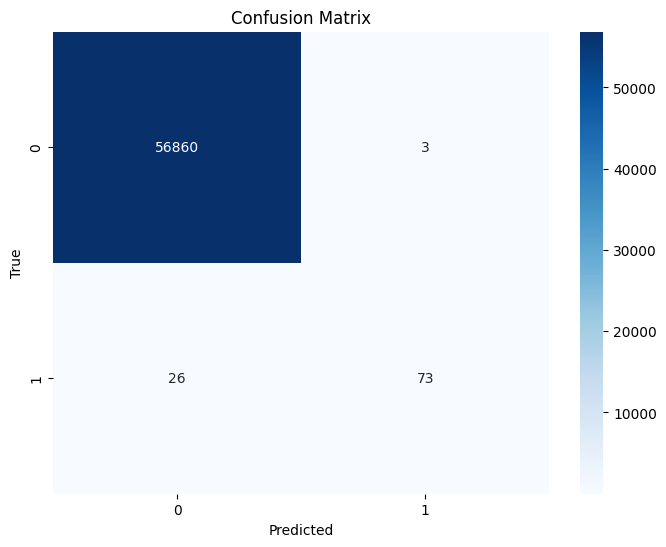

In [ ]:
cm = confusion_matrix(y_valid, y_pred_catboost)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
k = 100  # Number of folds
skf = StratifiedKFold(n_splits=k)

# Define the scoring metric as F1-score
scorer = make_scorer(f1_score, average='weighted')

# Perform stratified cross-validation and get the scores
scores = cross_val_score(catboost, X, y, cv=skf, scoring=scorer)

In [ ]:
# Print the scores
print("Cross-Validation Scores:", scores)
print("Mean F1-score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.99814765 1.         0.99966492 0.99879608 1.         0.99906822

 0.99906822 1.         0.9986309  1.         0.99966835 1.

 0.99918084 0.99962383 1.         0.99966481 1.         1.

 0.9996294  0.9996294  0.9996294  1.         0.9996294  1.

 1.         1.         1.         1.         1.         1.

 1.         0.9992101  0.9992101  0.99872118 1.         0.9992101

 0.9996294  0.9996294  0.9996294  1.         0.99929775 0.99966481

 0.99929775 0.9996294  0.9992101  0.9992101  0.9992101  0.9996294

 0.9996294  0.9992101  0.9992101  1.         0.99782509 0.9988882

 0.99966481 0.9996294  1.         0.99859551 0.99812783 0.99842019

 1.         1.         1.         1.         1.         0.9996294

 0.99929775 1.         0.9996294  1.         1.         1.

 0.9992101  0.9996294  0.9992101  1.         0.9992101  0.9992101

 0.9996294  0.9996294  0.9996294  0.9992101  0.99872118 0.9996294

 1.         0.9992101  0.9996294  0.9996294  0.9992101  0.9996294

 1

## Data Balancing
For the data balancing we are going to choose the SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)

Xtrain_balanced, ytrain_balanced = sm.fit_resample(X_train, y_train)

counter = Counter(ytrain_balanced)

print(counter)

Counter({0: 170588, 1: 170588})


In [ ]:
# Here we'll add the Lightgbm classifier
def fit_boosting_models(X_train, y_train, X_valid, y_valid) -> Dict[str, Dict[str, float]]:
    models = {}

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)

    # Random Forest

    rf = RandomForestClassifier(random_state=42, n_estimators= 1000)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_valid)
    y_pred_rf = rf.predict(X_valid).astype('int64')
    models["rf"] = {
        "Accuracy": accuracy_score(y_valid,y_pred_rf ),
        "Precision": precision_score(y_valid, y_pred_rf),
        "Recall": recall_score(y_valid, y_pred_rf),
        "F1 Score": f1_score(y_valid, y_pred_rf)
    }


    # AdaBoost Classifier
    adaboost = AdaBoostClassifier(random_state=42, n_estimators= 1000)
    adaboost.fit(X_train, y_train)
    y_pred_adaboost = adaboost.predict(X_valid)
    y_pred_adaboost = y_pred_adaboost.astype('int64')
    models["AdaBoost"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_adaboost),
        "Precision": precision_score(y_valid, y_pred_adaboost),
        "Recall": recall_score(y_valid, y_pred_adaboost),
        "F1 Score": f1_score(y_valid, y_pred_adaboost)
    }


    # LightGBM Classifier
    lgbm = LGBMClassifier(random_state=42, n_estimators=1000)
    lgbm.fit(X_train, y_train)
    y_pred_lgbm = lgbm.predict(X_valid)
    y_pred_lgbm = y_pred_lgbm.astype('int64')
    models["LightGBM"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_lgbm),
        "Precision": precision_score(y_valid, y_pred_lgbm),
        "Recall": recall_score(y_valid, y_pred_lgbm),
        "F1 Score": f1_score(y_valid, y_pred_lgbm)
    }


    # Gradient Boosting Classifier
    gradboost = GradientBoostingClassifier(random_state=42, n_estimators= 1000)
    gradboost.fit(X_train, y_train)
    y_pred_gradboost = gradboost.predict(X_valid)
    y_pred_gradboost = y_pred_gradboost.astype('int64')
    models["Gradient Boosting"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_gradboost),
        "Precision": precision_score(y_valid, y_pred_gradboost),
        "Recall": recall_score(y_valid, y_pred_gradboost),
        "F1 Score": f1_score(y_valid, y_pred_gradboost)
    }

    # XGBoost Classifier
    xgboost = XGBClassifier(random_state=42, n_estimators= 1000)
    xgboost.fit(X_train, y_train)
    y_pred_xgboost = xgboost.predict(X_valid)
    y_pred_xgboost = y_pred_xgboost.astype('int64')
    models["XGBoost"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_xgboost),
        "Precision": precision_score(y_valid, y_pred_xgboost),
        "Recall": recall_score(y_valid, y_pred_xgboost),
        "F1 Score": f1_score(y_valid, y_pred_xgboost)
    }


    # CatBoost Classifier
    catboost = CatBoostClassifier(random_state=42, silent=True, n_estimators= 1000)
    catboost.fit(X_train, y_train)
    y_pred_catboost = catboost.predict(X_valid)
    y_pred_catboost = y_pred_catboost.astype('int64')
    models["CatBoost"] = {
        "Accuracy": accuracy_score(y_valid, y_pred_catboost),
        "Precision": precision_score(y_valid, y_pred_catboost),
        "Recall": recall_score(y_valid, y_pred_catboost),
        "F1 Score": f1_score(y_valid, y_pred_catboost)
    }


    for model_name, model_metrics in models.items():
        print(f"Metrics for {model_name}:")
        for metric_name, metric_value in model_metrics.items():
            print(f"\t{metric_name}: {metric_value:.4f}")
        print("")

    return models

In [ ]:
models_after_balancing = fit_boosting_models(Xtrain_balanced, ytrain_balanced, X_valid, y_valid)

In [ ]:
models_after_balancing

{'rf': {'Accuracy': 0.999385555282469,
  'Precision': 0.8555555555555555,
  'Recall': 0.7777777777777778,
  'F1 Score': 0.8148148148148148},
 'AdaBoost': {'Accuracy': 0.9983848881710614,
  'Precision': 0.5231788079470199,
  'Recall': 0.797979797979798,
  'F1 Score': 0.632},
 'LightGBM': {'Accuracy': 0.9994557775359011,
  'Precision': 0.8953488372093024,
  'Recall': 0.7777777777777778,
  'F1 Score': 0.8324324324324325},
 'Gradient Boosting': {'Accuracy': 0.9984551104244935,
  'Precision': 0.5401459854014599,
  'Recall': 0.7474747474747475,
  'F1 Score': 0.6271186440677967},
 'XGBoost': {'Accuracy': 0.999385555282469,
  'Precision': 0.8636363636363636,
  'Recall': 0.7676767676767676,
  'F1 Score': 0.8128342245989305},
 'CatBoost': {'Accuracy': 0.9992802219023208,
  'Precision': 0.8020833333333334,
  'Recall': 0.7777777777777778,
  'F1 Score': 0.7897435897435898}}

## Infrence
We notice that the best model is the lightgbm

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_estimators= 1000)
lgbm.fit(Xtrain_balanced, ytrain_balanced)
y_pred_lgbm = lgbm.predict(X_valid)
y_pred_lgbm = y_pred_lgbm.astype('int64')

In [ ]:
Accuracy =  accuracy_score(y_valid, y_pred_lgbm),
Pecision =  precision_score(y_valid, y_pred_lgbm),
Recall = recall_score(y_valid, y_pred_lgbm),
F1_Score =  f1_score(y_valid, y_pred_lgbm)

print("Accuracy", Accuracy)
print("Pecision", Pecision)
print("Recall", Recall)
print("F1_Score", F1_Score)


Accuracy (0.9994557775359011,)

Pecision (0.8863636363636364,)

Recall (0.7878787878787878,)

F1_Score 0.8342245989304813


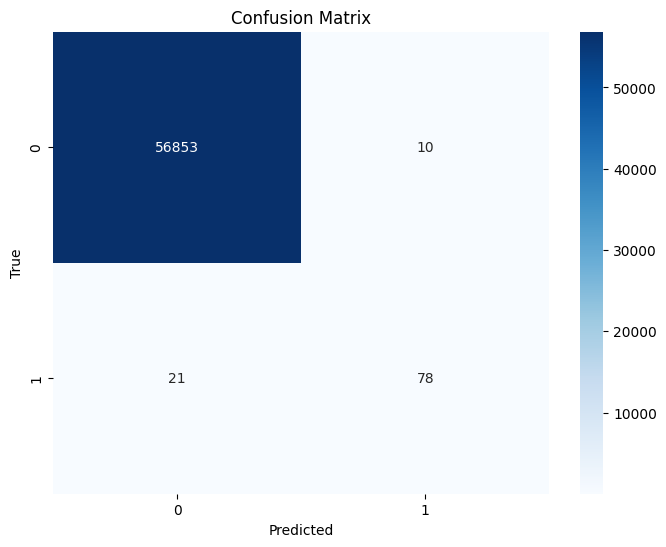

In [ ]:
cm = confusion_matrix(y_valid, y_pred_lgbm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
